<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/main/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Integration**
**Nolwenn Deschand**

# **Abstract**

In this lab we will implement methods for approximating integrals: the 2-point Gauss quadrature, the 3-point edge midpoint quadrature and the Monte-Carlo quadrature.

---

The functions are implemented thanks to the theory and formulas in the chapters 11 and 12 of the book *Methods in Computational Science*, from Johan Hoffman.

#**About the code**

In [ ]:
"""This program is a lab report using the provided template"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# written by Nolwenn Deschand (ddeschand@kth.se)
# Template by Johan Hoffman


'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [ ]:
# Load neccessary modules.
from google.colab import files

import numpy as np
import scipy.integrate as integrate
import math
from matplotlib import pyplot as plt


# **Introduction**

In this lab, we will implement three different quadrature methods to approximate integrals. The first two methods that we will implement, the 2-point Gauss quadrature and the 3-point edge midpoint quadrature are both Gauss quadratures, while the third one, the Monte Carlo quadrature, is a stochastic method. 
For the Gauss quadratures, the idea is to find the quadrature points and weights by solving an equation, and for the Monte Carlo quadrature, the quadrature points are randomly generated following a uniform distribution. 



# **Method**

**Implementation of the 2-point Gauss quadrature over a unit interval**

The 2-point Gauss rule on the interval $[0,1]$ is given by $\int_{0}^{1}p(x)dx = p(x_0)w_0 + p(x_1)w_1$
which is exact for cubic polynomials in the form $p(x) = c_{3}x^3 + c_{2}x^2 + c_{1}x + c_0$. 

From the book, we have
$\int_{0}^{1} \sum_{i=0}^{3} c_{i}x^{i}dx = w_0 \sum_{i=0}^{3}p(x_0) + w_1\sum_{i=0}^{3}p(x_1)$

$\Leftrightarrow c_0 + \frac{c_1}{2}  + \frac{c_2}{3} + \frac{c_3}{4} = c_0(-w_0-w_1) + c_1(-w_0x_{0} -w_1x_{1} + c_2(-w_0x_{0}^2 -w_1x_{1}^2) + c_3(-w_0x_{0}^3 -w_1x_{1}^3) $


$\Leftrightarrow c_0(1-w_0-w_1) + c_1(\frac{1}{2} -w_0x_{0} -w_1x_{1} + c_2(\frac{1}{3} -w_0x_{0}^2 -w_1x_{1}^2) + c_3(\frac{1}{4} -w_0x_{0}^3 -w_1x_{1}^3) = 0$

The solution of this equation is (see example 11.3 in the book):

$w_0 = w_1 = \frac{1}{2}$

$x_0 = \frac{\sqrt{3}+1}{2\sqrt{3}}$

$x_1 = \frac{\sqrt{3}-1}{2\sqrt{3}}$

Now that we have these quadrature points, we can approximate the integral of cubic polynomials on the unit interval $[0,1]$ using the formula $\int_{0}^{1}p(x)dx = p(x_0)w_0 + p(x_1)w_1$

Our function will take as input a function f for which we want to approximate the integral and the output will be the integral of this function over the unit interval.

In [ ]:
def gauss_quadrature(f):

  x0 = (math.sqrt(3)+1)/(2*math.sqrt(3))
  x1 = (math.sqrt(3)-1)/(2*math.sqrt(3))
  w0 = 1/2
  w1 = 1/2

  approx = f(x0) * w0 + f(x1) * w1

  return approx

**Implementation of the 3-point edge midpoint quadrature over a reference triangle**


 We want to implement the 3-point edge midpoint quadrature over the reference triangle which is defined in 2 dimensions. As we are in 2 dimensions, the equation to solve to find the quadrature points and weights is now:

$\sum_{j=0}^{2}\varphi_i(x_j,y_j)w_j = \int_{0}^{1}\int_{0}^{1-x} \varphi_i(x,y)dy dx $

with the basis functions:

$φ_0(x,y)=1$ 

$φ_1(x,y)=x$ 

$φ_2(x,y)=y$

$φ_3(x,y)=xy$

$φ_4(x,y)=x^2$

$φ_5(x,y)=y^2$

This equation would give exact solutions for quadratic polynomials of the form $c_{5}x^2 + c_{4}y^2 + c_{3}xy + c_{2x} + c_{1}y + c_0$

However as we want to implement the midpoint quadrature rule, which is a rule where the quadrature points are the midpoints of the reference intervals, we don't need to solve this equation and can directly get the quadrature points.
Over a reference triangle of coordinates $(0,1) (1,0) (1,1)$, the quadrature points are:
$(\frac{1}{2}, 0) (0,\frac{1}{2}) (\frac{1}{2} \frac{1}{2})$

From book example 11.5, we get that these quadrature points are associated with the following weights:
$w_0 = w_1 = w_2 = \frac{1}{6}$.

As an input for the 3-point midpoint_quadrature will take the function f for which we want to approximate the integral, and the output will be the quadrature approximation of the integral of f over the reference triangle.

In [ ]:
def midpoint_quadrature(f):
  w0 = w1 = w2 = 1/6
  x0 = 1/2
  y0 = 0
  x1 = 0
  y1 = 1/2
  x2 = 1/2
  y2 = 1/2
   
  approx = f(x0,y0) * w0 + f(x1,y1) * w1 + f(x2,y2)* w2
  return approx


**Implementation of the Monte Carlo quadrature over a unit interval**

To approximate a deterministic integral it is also possible to randomly select the quadrature points. This is the approach of the Monte Carlo quadrature rule. 


First we generate a random sample from the independent uniformly distributed random variable $X ∼ U(D)$ with the state space equal to the domain of integration. For $n$ a large number, the Monte Carlo quadrature rule is given by (equation 12.3):

$\int_{D}g(x)dx	\approx \frac{|D|}{n}\sum_{i=1}^{n} g(x_i) = \frac{1}{n}\sum_{i=1}^{n} g(x_i)|D|$

with g the function for which we want to approximate the integral and D the domain for which we want to approximate the integral, here $[0,1]$.

Our implementation will take as input the function f for which we want to approximate the integral and n the number of quadrature points. The output will be the integral approximation of f over the interval  $[0,1]$.


In [ ]:
def mc_quadrature(f,n):
  x = np.random.uniform(0,1,n)

  sum = 0
  for i in range(n-1):
    sum += f(x[i])
  
  sum = sum/n

  return sum


# **Results**

**Implementation of the 2-point Gauss quadrature over a unit interval**

To test our implementation of the 2-point Gauss quadrature, we can compare the approximated value with exact integration of a cubic polynomials $c_{3}x^3 + c_{2}x^2 + c_{1}x + c_0$.

The exact value of the integral for cubic polynomials is: $c_0 + \frac{c_1}{2}  + \frac{c_2}{3} + \frac{c_3}{4}$

We can also compare it with the value from the integrating function of scipy.

The coeffs $(c_{3}, c_{2},c_{1}, c_0)$ are randomly generated.

In [ ]:
#c0,c1,c2,c3
coeffs = [0,0,0,0]
for i in range(4):
  coeffs[i] = np.random.randint(-10,10)

print("coeffs: ",coeffs)

def function(x):
  return coeffs[3]*(x**3) + coeffs[2]*(x**2) + coeffs[1]*x + coeffs[0]

approx = gauss_quadrature(function)
exact_integral = coeffs[0]+coeffs[1]/2 + coeffs[2]/3 + coeffs[3]/4

print("2-point Gauss approximation:         ",approx)
print("exact integral:                      ", exact_integral)
print("scipy library value:                 ",integrate.quad(lambda x: function(x), 0, 1)[0])

coeffs:  [-8, -8, -5, 9]
2-point Gauss approximation:          -11.416666666666666
exact integral:                       -11.416666666666666
scipy library value:                  -11.416666666666668


The results are very close to each other, the implementation of the 2-point Gauss quadrature rule works as intented on the test polynomials.

**Implementation of the 3-point edge midpoint quadrature over a reference triangle**

As for the 2-point Gauss quadrature, we will compare our approximation to the exact solution and to the answer of the scipy library.

We can get the exact solution by computing the integral $\int_{0}^{1}\int_{0}^{1-x} c_{5}x^2 + c_{4}y^2 + c_{3}xy + c_{2}x + c_{1}y + c_0 dydx$ which is equal to:

$\frac{c_5}{12} + \frac{c_4}{12} + \frac{C_3}{24} + \frac{c_2}{6} + \frac{C_1}{6} + \frac{C_0}{2} $


The coeffs $(c_{5},c_{4},c_{3}, c_{2},c_{1}, c_0)$ are randomly generated.

In [ ]:
#c0,c1,c2,c3,c4,c5
coeffs = [0,0,0,0,0,0]
for i in range(6):
  coeffs[i] = np.random.randint(-10,10)

print("coeffs: ",coeffs)

def function(x,y):
  return coeffs[5]*(x**2) + coeffs[4]*(y**2) + coeffs[3]*x*y + coeffs[2]*x + coeffs[1]*y + coeffs[0]

approx = midpoint_quadrature(function)
exact_integral = coeffs[0]/2+coeffs[1]/6 + coeffs[2]/6 + coeffs[3]/24 + coeffs[4]/12 + coeffs[5]/12


print("3-point midpoint approximation:      ",approx)
print("exact integral:                      ", exact_integral)
print("scipy library value:                 ",integrate.dblquad(function, 0, 1, lambda x:0, lambda x:1-x)[0])

coeffs:  [7, -2, -4, -5, -3, -3]
3-point midpoint approximation:       1.7916666666666665
exact integral:                       1.7916666666666665
scipy library value:                  1.7916666666666665


The results are very close to each other, the implementation of the 3-point edge midpoint quadrature rule works as intented on the test polynomials.

**Implementation of the Monte Carlo quadrature over a unit interval**

For testing the Monte Carlo quadrature over a unit interval, we will first compute the approximated value to the value of the scipy library and then compute the convergence rate of our implementation: the error should be reduced following the rate $\frac{1}{\sqrt(n)}$ with n the number of quadrature points.


coeffs: [-1, 1, -2, -4]
Monte Carlo approximation:   -2.1563034399979135
scipy library value:         -2.166666666666667


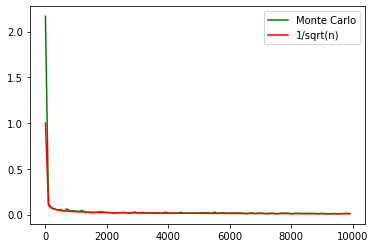

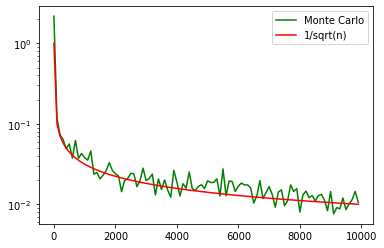

In [ ]:
#c0,c1,c2,c3
coeffs = [0,0,0,0]
for i in range(4):
  coeffs[i] = np.random.randint(-10,10)

print("coeffs:", coeffs)

def function(x):
  return coeffs[3]*(x**3) + coeffs[2]*(x**2) + coeffs[1]*x + coeffs[0]

approx_result = mc_quadrature(function, 10000)

print("Monte Carlo approximation:  ",approx_result)
result = integrate.quad(lambda x: function(x), 0, 1)[0]
print("scipy library value:        ",integrate.quad(lambda x: function(x), 0, 1)[0])

x = []
y = []
inv_sqrt = []
for n in range (1,10000, 100):
  x.append(n)
  mean_err = 0 
  for i in range (10):
    mean_err += abs(mc_quadrature(function, n)-result)
  mean_err /= 10
  y.append(mean_err)
  inv_sqrt.append(1/math.sqrt(n))

plt.figure()
plt.plot(x, y, 'g',label= "Monte Carlo")
plt.plot(x, inv_sqrt, 'r',label= "1/sqrt(n)")
plt.legend(loc="upper right")

plt.figure()
plt.plot(x, y, 'g',label= "Monte Carlo")
plt.plot(x, inv_sqrt, 'r',label= "1/sqrt(n)")
plt.legend(loc="upper right")
plt.yscale('log')

plt.show()

The first thing we can say is that the Monte Carlo approximation and the value using the scipy library are pretty close.

Concerning the convergence rate, we can see on the first plot that the two curves are very close and seem to follow the same tendency. If we plot using the logarithmic scale and taking the mean error of 10 values for each x for the Monte Carlo integral, we get the second plot. The green curve, representing the error of the Monte Carlo integral is following the tendency of the curve $\frac{1}{\sqrt(n)}$.

The implementation works as intented on this test case.

# **Discussion**

We have implemented three different methods to estimate integrals over unit intervals or triangles. The three methods were very easy to implement and give good results on the test case.s We can notice that the two first Gauss quadrature methods are closer to the exact result, which is due to the order of the polynomial used for testing, because the Gauss quadrature methods are supposed to be exact for polynomials up to a certain order. The Monte Carlo approximation will be better for larger polynomials without further modification, while for the Gauss quadrature methods, it will be required to increase the number of quadrature points, which require to solve harder equations.